In [6]:
# import
from pprint import pprint
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from pylab import *
import keyword

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

In [7]:
df = pd.read_csv('Indeed_cleaned.csv')

In [8]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [10]:
df.columns

Index(['Title', 'Company', 'City', 'jobs', 'Salary_min', 'Salary_max',
       'Salary_ave', 'Median'],
      dtype='object')

In [11]:
df.shape

(1301, 8)

## Data Dictionary

In [12]:
data_dict = {'column_names':['Title', 'Company', 'City', 'jobs', 'Salary_min', 'Salary_max', 'Salary_ave'],
                  'data_type':['object','object','object','object','object',
                               'float64', 'float64', 'float64'],
                  'description':['Later', 'Later'],
                  'shape':'2857 rows by 8 columns'
                 }
data_dict

{'column_names': ['Title',
  'Company',
  'Description',
  'City',
  'jobs',
  'Salary_min',
  'Salary_max',
  'Salary_ave'],
 'data_type': ['object',
  'object',
  'object',
  'object',
  'object',
  'float64',
  'float64',
  'float64'],
 'description': ['Later', 'Later'],
 'shape': '2857 rows by 8 columns'}

In [13]:
print(f'Summary Stat: Min Salary: ', df.Salary_min.describe(include='all'))
print('------------------------------------------------------------')
print(f'Summary Stat: Max Salary: ', df.Salary_max.describe(include='all'))
print('------------------------------------------------------------')
print(f'Summary Stat: Ave Salary: ', df.Salary_ave.describe(include='all'))

Summary Stat: Min Salary:  count      1301.000000
mean      47116.451138
std       18662.122062
min       15965.040000
25%       35700.000000
50%       42241.430000
75%       53550.000000
max      178500.000000
Name: Salary_min, dtype: float64
------------------------------------------------------------
Summary Stat: Max Salary:  count      1301.000000
mean      56068.576854
std       22207.925254
min       18998.397600
25%       42483.000000
50%       50267.301700
75%       63724.500000
max      212415.000000
Name: Salary_max, dtype: float64
------------------------------------------------------------
Summary Stat: Ave Salary:  count      1301.000000
mean      56068.576854
std       22207.925254
min       18998.397600
25%       42483.000000
50%       50267.301700
75%       63724.500000
max      212415.000000
Name: Salary_ave, dtype: float64


## Explore the target variable: Salary

<AxesSubplot:ylabel='Count'>

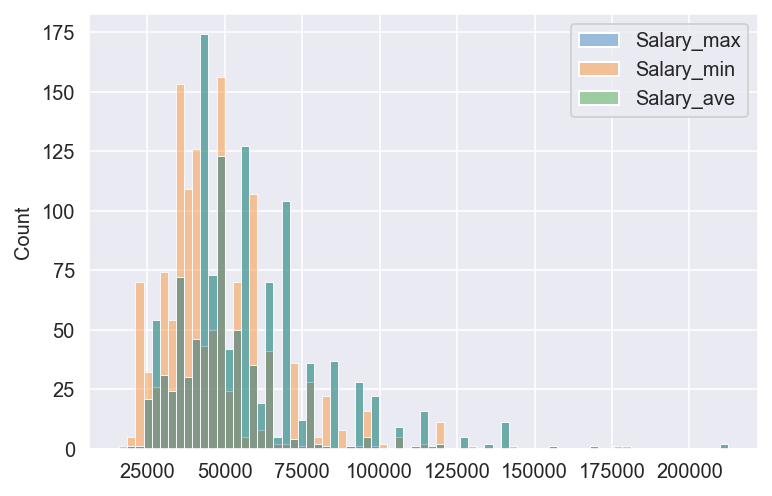

In [15]:
# Style
sns.set_style(style = 'darkgrid')
# df[['Salary_max','Salary_min','Salary_ave']].plot.hist(alpha=0.4, bins=50)
sns.histplot(df[['Salary_max','Salary_min','Salary_ave']], bins=75,alpha = .4, cbar=True)

<AxesSubplot:>

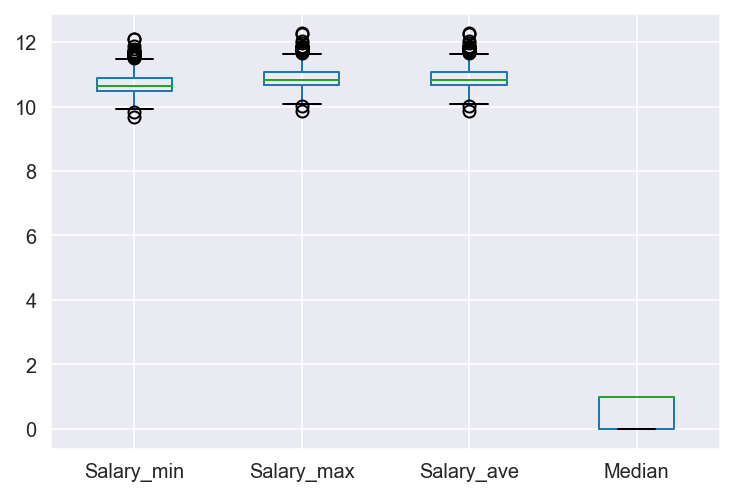

In [28]:
df.plot.box()

**Normalizing the distributions**

In [29]:
#Applying log transformation to remove skewness and make target variable normally distributed
df[['Salary_max','Salary_min','Salary_ave']] = np.log1p(df[['Salary_max','Salary_min','Salary_ave']])

<AxesSubplot:ylabel='Count'>

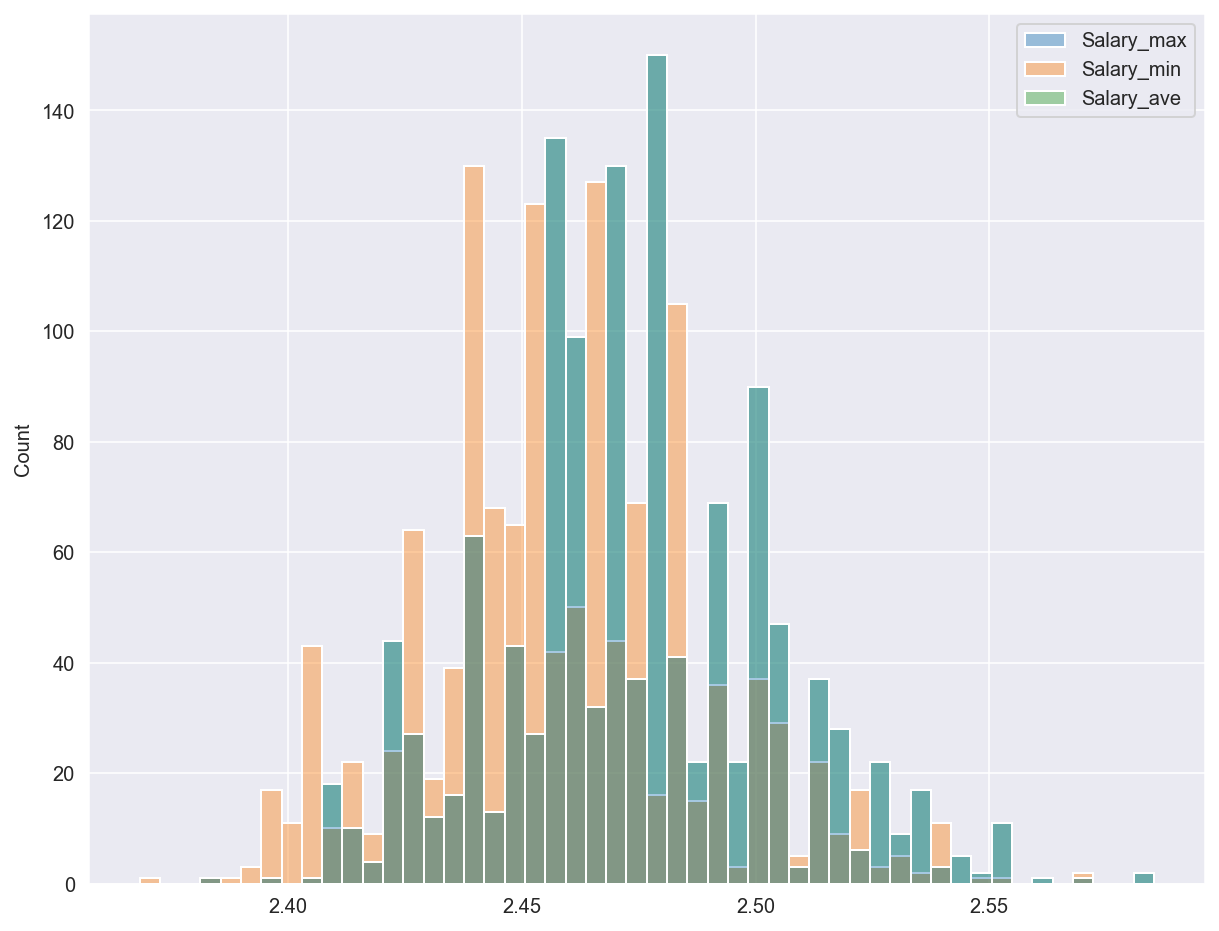

In [30]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.histplot(df[['Salary_max','Salary_min','Salary_ave']], bins=50,alpha = .4, cbar=True)

<AxesSubplot:>

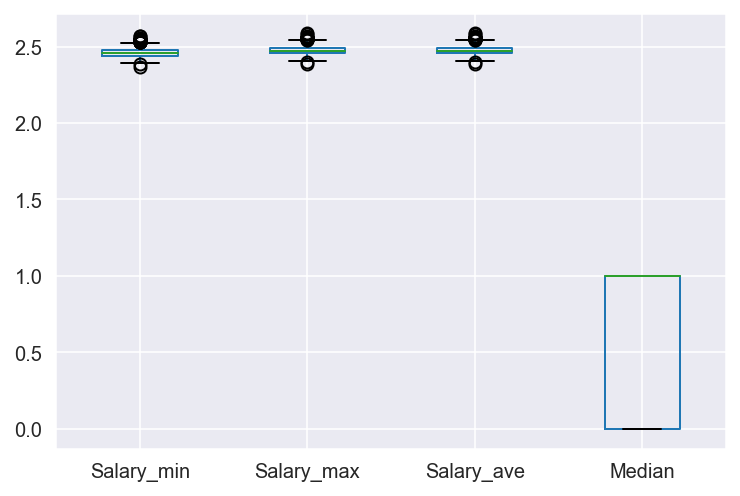

In [31]:
df.plot.box()

## Explore the entire dataset

In [32]:
df.head()

,Title,Company,City,jobs,Salary_min,Salary_max,Salary_ave,Median
0,Research Analyst - Portuguese Speaking,Metrica Recruitment,Exeter,business+intelligence,2.434836,2.449961,2.449961,0
1,Intern - Performance & Business Intelligence,South Wales Police,Cardiff,business+intelligence,2.402403,2.418023,2.418023,0
2,Business Intelligence Developer,Avon and Somerset Constabulary,Cardiff,business+intelligence,2.450729,2.465617,2.465617,0
3,Business Analyst,LookAfterMyBills,Cardiff,business+intelligence,2.465606,2.480276,2.480276,1
4,Intern - Data Science,South Wales Police,Cardiff,business+intelligence,2.402403,2.418023,2.418023,0


In [33]:
df = pd.get_dummies(df, columns = ['City'])

In [34]:
df.columns

Index(['Title', 'Company', 'jobs', 'Salary_min', 'Salary_max', 'Salary_ave',
       'Median', 'City_Bath', 'City_Belfast', 'City_Birmingham',
       'City_Bristol', 'City_Cambridge', 'City_Cardiff', 'City_Edinburgh',
       'City_Exeter', 'City_Glasgow', 'City_Leeds', 'City_Liverpool',
       'City_London', 'City_Manchester', 'City_Newcastle', 'City_Oxford'],
      dtype='object')

In [35]:
df.corr()

,Salary_min,Salary_max,Salary_ave,Median,City_Bath,City_Belfast,City_Birmingham,City_Bristol,City_Cambridge,City_Cardiff,City_Edinburgh,City_Exeter,City_Glasgow,City_Leeds,City_Liverpool,City_London,City_Manchester,City_Newcastle,City_Oxford
Salary_min,1.000000,1.000000,1.000000,0.767869,-0.020070,-0.035072,0.021569,0.012830,0.005714,-0.060839,-0.004019,-0.025105,-0.100182,-0.055012,-0.092857,0.234403,-0.100738,-0.134174,0.039813
Salary_max,1.000000,1.000000,1.000000,0.767803,-0.020084,-0.035074,0.021559,0.012828,0.005705,-0.060844,-0.004021,-0.025113,-0.100171,-0.055025,-0.092862,0.234433,-0.100738,-0.134153,0.039802
Salary_ave,1.000000,1.000000,1.000000,0.767803,-0.020084,-0.035074,0.021559,0.012828,0.005705,-0.060844,-0.004021,-0.025113,-0.100171,-0.055025,-0.092862,0.234433,-0.100738,-0.134153,0.039802
Median,0.767869,0.767803,0.767803,1.000000,0.002071,-0.049432,0.077309,0.009060,-0.053556,-0.031777,-0.024106,-0.033179,-0.090063,-0.011244,-0.102042,0.204712,-0.133392,-0.095940,0.032136
City_Bath,-0.020070,-0.020084,-0.020084,0.002071,1.000000,-0.024367,-0.084145,-0.068021,-0.063342,-0.046126,-0.041991,-0.022226,-0.044395,-0.077130,-0.054058,-0.155004,-0.085931,-0.042603,-0.070880
City_Belfast,-0.035072,-0.035074,-0.035074,-0.049432,-0.024367,1.000000,-0.032148,-0.025988,-0.024200,-0.017623,-0.016043,-0.008492,-0.016962,-0.029468,-0.020653,-0.059221,-0.032831,-0.016277,-0.027080
City_Birmingham,0.021569,0.021559,0.021559,0.077309,-0.084145,-0.032148,1.000000,-0.089744,-0.083570,-0.060856,-0.055400,-0.029324,-0.058573,-0.101761,-0.071321,-0.204504,-0.113373,-0.056208,-0.093515
City_Bristol,0.012830,0.012828,0.012828,0.009060,-0.068021,-0.025988,-0.089744,1.000000,-0.067556,-0.049195,-0.044785,-0.023705,-0.047349,-0.082262,-0.057655,-0.165318,-0.091649,-0.045438,-0.075596
City_Cambridge,0.005714,0.005705,0.005705,-0.053556,-0.063342,-0.024200,-0.083570,-0.067556,1.000000,-0.045811,-0.041703,-0.022075,-0.044092,-0.076602,-0.053689,-0.153944,-0.085344,-0.042312,-0.070395
City_Cardiff,-0.060839,-0.060844,-0.060844,-0.031777,-0.046126,-0.017623,-0.060856,-0.049195,-0.045811,1.000000,-0.030369,-0.016075,-0.032108,-0.055783,-0.039097,-0.112104,-0.062148,-0.030812,-0.051263


In [43]:
df.cov()

,Salary_min,Salary_max,Salary_ave,Median,City_Bath,City_Belfast,City_Birmingham,City_Bristol,City_Cambridge,City_Cardiff,City_Edinburgh,City_Exeter,City_Glasgow,City_Leeds,City_Liverpool,City_London,City_Manchester,City_Newcastle,City_Oxford
Salary_min,0.000914,0.000900,0.000900,0.011437,-0.000144,-0.000101,0.000196,0.000097,0.000041,-0.000325,-0.000020,-0.000066,-0.000517,-0.000465,-0.000575,0.003160,-0.000929,-0.000665,0.000313
Salary_max,0.000900,0.000887,0.000887,0.011269,-0.000142,-0.000100,0.000193,0.000096,0.000040,-0.000320,-0.000019,-0.000065,-0.000509,-0.000458,-0.000566,0.003114,-0.000915,-0.000656,0.000309
Salary_ave,0.000900,0.000887,0.000887,0.011269,-0.000142,-0.000100,0.000193,0.000096,0.000040,-0.000320,-0.000019,-0.000065,-0.000509,-0.000458,-0.000566,0.003114,-0.000915,-0.000656,0.000309
Median,0.011437,0.011269,0.011269,0.242842,0.000242,-0.002330,0.011430,0.001122,-0.006230,-0.002769,-0.001923,-0.001428,-0.007571,-0.001549,-0.010296,0.044992,-0.020054,-0.007758,0.004122
City_Bath,-0.000144,-0.000142,-0.000142,0.000242,0.056403,-0.000553,-0.005995,-0.004058,-0.003551,-0.001937,-0.001614,-0.000461,-0.001799,-0.005119,-0.002629,-0.016418,-0.006226,-0.001660,-0.004381
City_Belfast,-0.000101,-0.000100,-0.000100,-0.002330,-0.000553,0.009146,-0.000922,-0.000624,-0.000546,-0.000298,-0.000248,-0.000071,-0.000277,-0.000788,-0.000404,-0.002526,-0.000958,-0.000255,-0.000674
City_Birmingham,0.000196,0.000193,0.000193,0.011430,-0.005995,-0.000922,0.090008,-0.006764,-0.005919,-0.003228,-0.002690,-0.000769,-0.002998,-0.008532,-0.004381,-0.027364,-0.010377,-0.002767,-0.007302
City_Bristol,0.000097,0.000096,0.000096,0.001122,-0.004058,-0.000624,-0.006764,0.063114,-0.004006,-0.002185,-0.001821,-0.000520,-0.002029,-0.005775,-0.002966,-0.018523,-0.007024,-0.001873,-0.004943
City_Cambridge,0.000041,0.000040,0.000040,-0.006230,-0.003551,-0.000546,-0.005919,-0.004006,0.055725,-0.001912,-0.001593,-0.000455,-0.001776,-0.005054,-0.002595,-0.016208,-0.006146,-0.001639,-0.004325
City_Cardiff,-0.000325,-0.000320,-0.000320,-0.002769,-0.001937,-0.000298,-0.003228,-0.002185,-0.001912,0.031265,-0.000869,-0.000248,-0.000968,-0.002756,-0.001415,-0.008841,-0.003352,-0.000894,-0.002359


In [52]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

<AxesSubplot:>

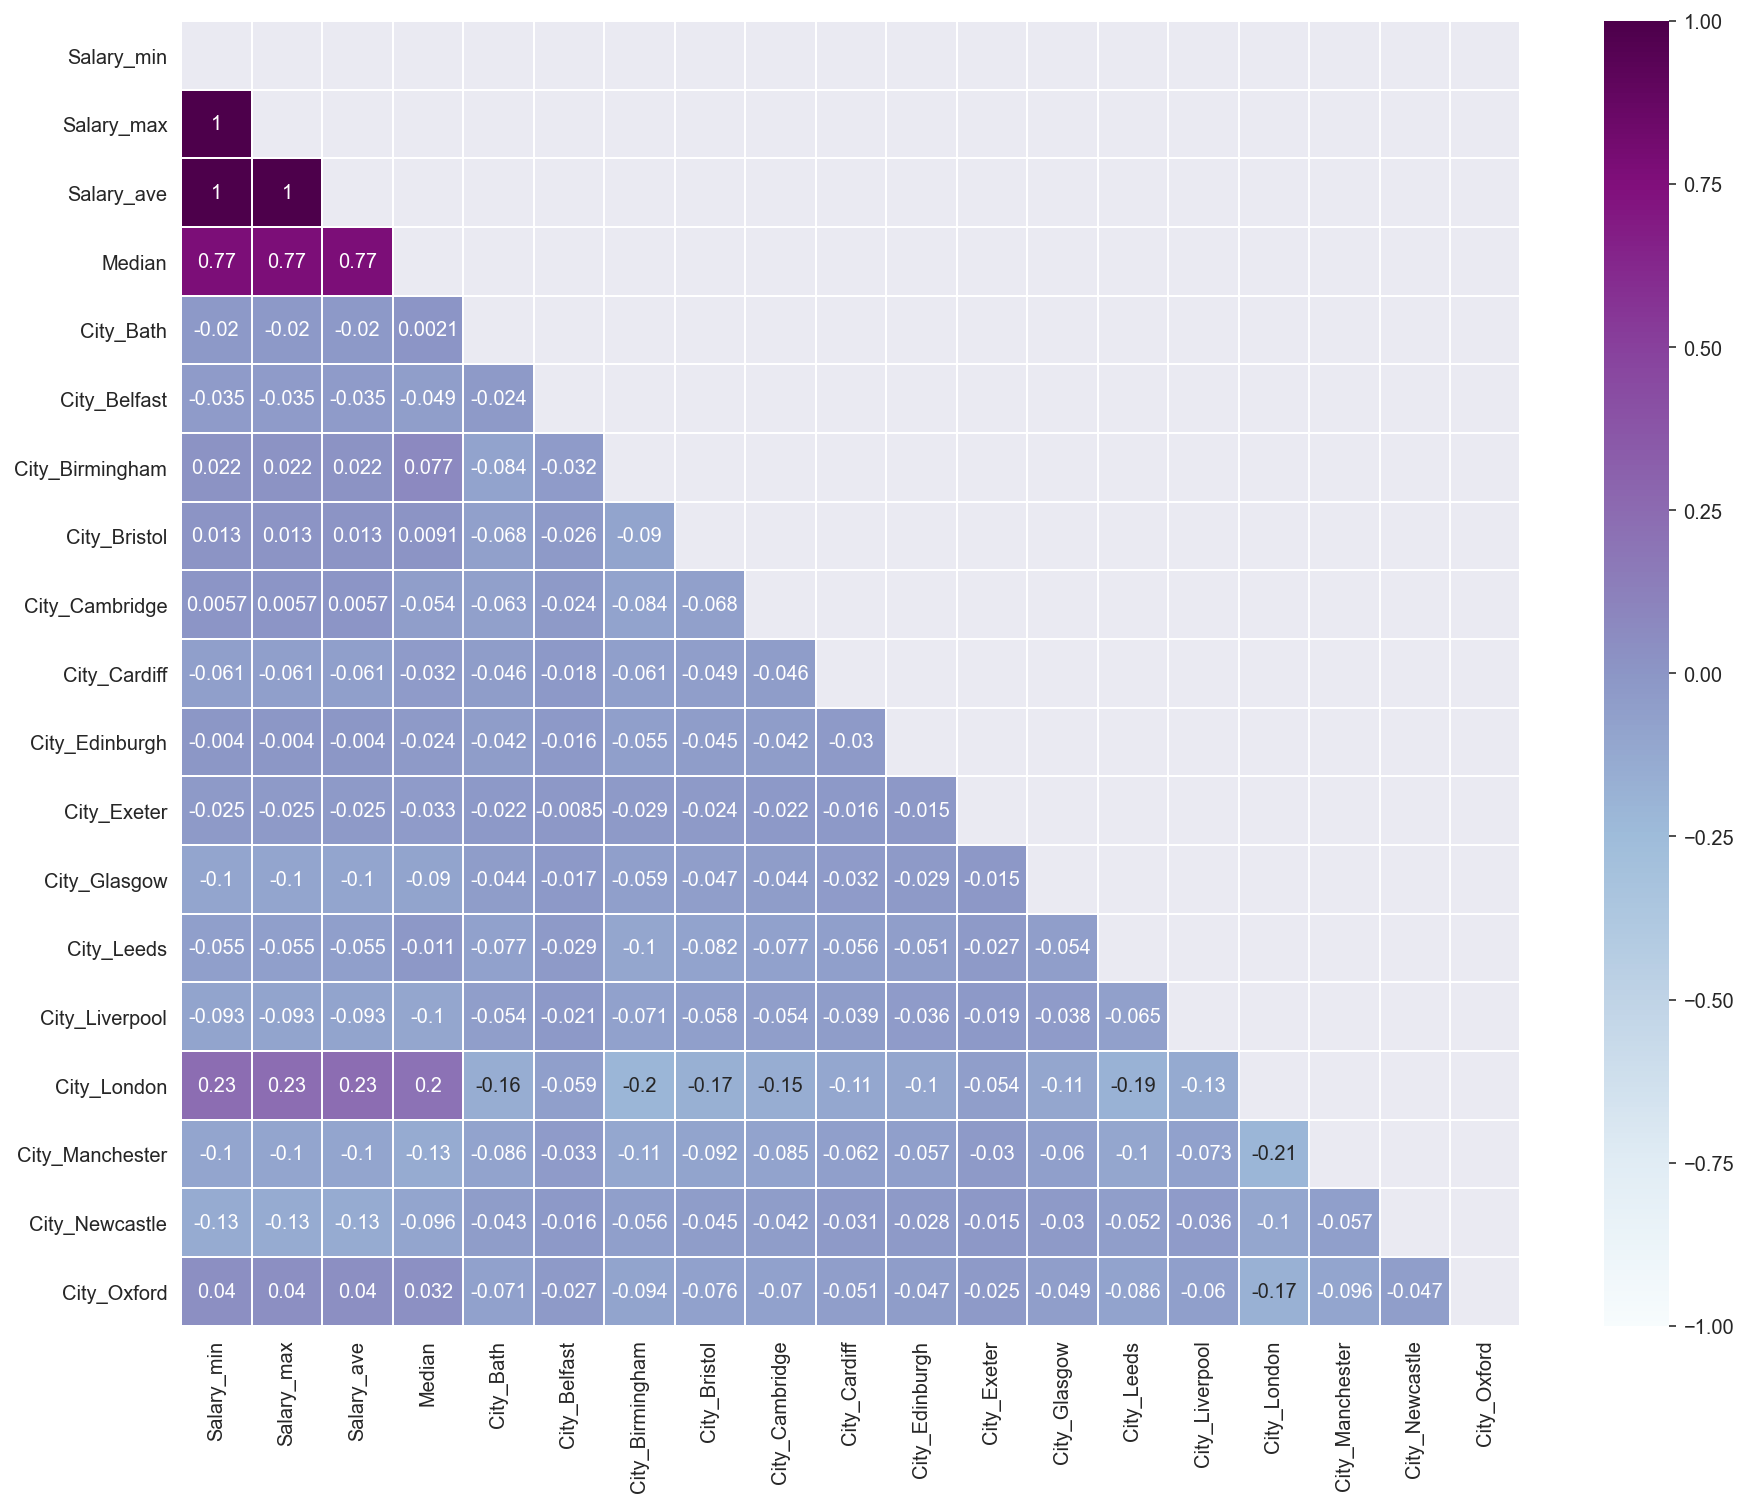

In [54]:
# Set the  matplotlib figure size:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(),
            mask=mask,
            cmap="BuPu",
            vmax=1,
            vmin=-1,
            annot=True,
            linewidths=.5,
            robust=True)